[View in Colaboratory](https://colab.research.google.com/github/sabumjung/DL-with-TensorFlow/blob/DL-with-TensorFlow/5%EC%9E%A5_1.ipynb)

In [0]:
#오토인코더에 대한 소스코드
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# MNIST 데이터 임포트
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
# 신경망 훈련 파라미터 설정
learning_rate = 0.01
training_epochs = 10
batch_size = 256
display_step = 1
examples_to_show = 4

# 신경망 파라미터
n_hidden_1 = 256 # 1번째 계층 feature 차원
n_hidden_2 = 128 # 2번째 계층 feature 차원
n_input = 784 # MNIST 데이터 입력 차원(img shape: 28*28)

# tf 그래프 입력 (그림만 입력)
X = tf.placeholder("float", [None, n_input])

# 가중치
weights = {
    'encoder_h1': tf.Variable\
    (tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable\
    (tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable\
    (tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable\
    (tf.random_normal([n_hidden_1, n_input])),
}

# 바이어스
biases = {
    'encoder_b1': tf.Variable\
    (tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable\
    (tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable\
    (tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable\
    (tf.random_normal([n_input])),
}

In [0]:
# 인코더 은닉층 : 시그모이드 활성화 함수 #1
encoder_in = tf.nn.sigmoid(tf.add\
                           (tf.matmul(X, \
                                      weights['encoder_h1']),\
                            biases['encoder_b1']))

# 인코더 은닉층 : 시그모이드 활성화 함수 #2
encoder_out = tf.nn.sigmoid(tf.add\
                            (tf.matmul(encoder_in,\
                                       weights['encoder_h2']),\
                             biases['encoder_b2']))


# 디코더 은닉층 : 시그모이드 활성화 함수 #1
decoder_in = tf.nn.sigmoid(tf.add\
                           (tf.matmul(encoder_out,\
                                      weights['decoder_h1']),\
                            biases['decoder_b1']))

# 디코더 은닉층 : 시그모이드 활성화 함수 #2
decoder_out = tf.nn.sigmoid(tf.add\
                            (tf.matmul(decoder_in,\
                                       weights['decoder_h2']),\
                             biases['decoder_b2']))


# 예측값 저장변수
y_pred = decoder_out
# 목표값(레이블)을 입력값으로 설정
y_true = X

# 손실함수 설정
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
# 최적화 방법 설정(RMSProp)
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# 변수 초기화
init = tf.global_variables_initializer()

('Epoch:', '0001', 'cost=', '0.206359759')
('Epoch:', '0002', 'cost=', '0.164151639')
('Epoch:', '0003', 'cost=', '0.149210602')
('Epoch:', '0004', 'cost=', '0.139710188')
('Epoch:', '0005', 'cost=', '0.133729950')
('Epoch:', '0006', 'cost=', '0.126430273')
('Epoch:', '0007', 'cost=', '0.123854131')
('Epoch:', '0008', 'cost=', '0.121055916')
('Epoch:', '0009', 'cost=', '0.117206670')
('Epoch:', '0010', 'cost=', '0.115130305')
Optimization Finished!


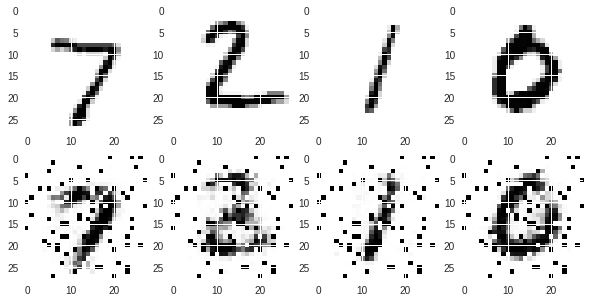

In [17]:
# 그래프 런칭
with tf.Session() as sess:
    sess.run(init)
    total_batch = int(mnist.train.num_examples/batch_size)
    # 훈련사이클 실시
    for epoch in range(training_epochs):
        # 모든 배치에 대해 반복 수행
        for i in range(total_batch):
            batch_xs, batch_ys =\
                      mnist.train.next_batch(batch_size)
            # 최적화 연산(backprop)와 비용연산을 수행하여 손실함수값을 계산함
            _, c = sess.run([optimizer, cost],\
                            feed_dict={X: batch_xs})
        # 각 에포크별 logs정보 표시
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(c))

    print("Optimization Finished!")

    # 테스트 집합에 대해 인코드와 디코드 적용
    encode_decode = sess.run(
        y_pred, feed_dict=\
        {X: mnist.test.images[:examples_to_show]})
    # 입력이미지와 재구성 이미지 비교
    f, a = plt.subplots(2, 4, figsize=(10, 5))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
    f.show()
    plt.draw()
    plt.show()